In [1]:
import time
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

import utils

In [2]:
tracks = utils.load('/Users/ivankwist/Downloads/fma_metadata/tracks.csv')
features = utils.load('/Users/ivankwist/Downloads/fma_metadata/features.csv')

In [3]:
subset = tracks.index[tracks['set', 'subset'] <= 'small']
tracks = tracks.loc[subset]
features = features.loc[subset]

train = tracks.index[tracks['set', 'split'] == 'training']
test = tracks.index[tracks['set', 'split'] == 'test']
labels = tracks['track', 'genre_top']

y_train = labels[train]
y_test = labels[test]
X_train = features.loc[train].as_matrix()
X_test = features.loc[test].as_matrix()

X_train, y_train = shuffle(X_train, y_train, random_state=25)

scaler = StandardScaler(copy=False)
scaler.fit_transform(X_train)
scaler.transform(X_test)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


array([[ 0.1253238 ,  0.59807614, -0.10177305, ..., -0.10643952,
        -0.8105098 , -0.84468934],
       [-0.34768999, -0.35213792, -0.0645586 , ..., -0.51699423,
        -0.23005883,  1.11347606],
       [-0.0231874 , -0.03538058, -0.03524516, ..., -0.51699423,
         0.08205794,  0.54353052],
       ...,
       [-0.47744417, -0.39346363, -0.15097715, ..., -0.31171687,
         0.04967999,  2.57694115],
       [-0.52918994, -0.47181669, -0.1345473 , ..., -0.10643952,
         1.22919953,  1.71213092],
       [-0.46718922, -0.3620704 , -0.06173892, ...,  1.33050197,
        -0.01398353,  3.47595249]])

In [4]:
model_to_set = OneVsRestClassifier(SVC(gamma='auto'))

parameters = {
    "estimator__C": [1,3,5,7,9],
}

In [5]:
gs = GridSearchCV(model_to_set, param_grid=parameters, verbose = 10, cv = 2, n_jobs = -1)

In [6]:
gs_results = gs.fit(X_train, y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 14.8min finished


In [7]:
gs_results.best_params_

{'estimator__C': 5}

In [8]:
score_gs = gs_results.score(X_test, y_test)
print(score_gs)

0.46


In [9]:
y_pred = gs_results.predict(X_test)

In [10]:
cf_matrix = confusion_matrix(y_test, y_pred)

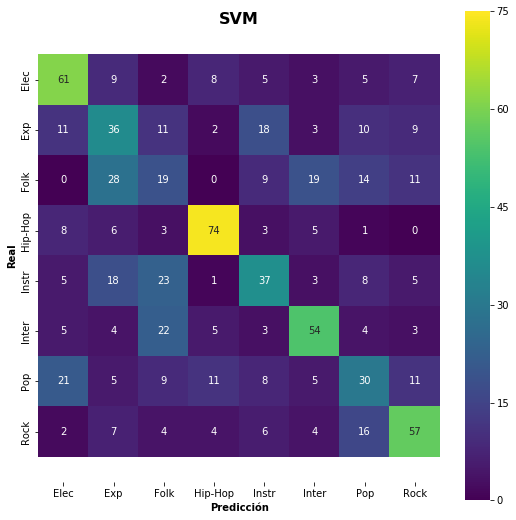

In [11]:
fig, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(cf_matrix, cmap='viridis', vmin=0, vmax=75, square=True, annot=True)

ticks_labels = ['Elec', 'Exp', 'Folk', 'Hip-Hop', 'Instr', 'Inter', 'Pop', 'Rock']
plt.xticks(np.arange(8) + .5, labels=ticks_labels, fontsize = 10)
plt.yticks(np.arange(8) + .5, labels=ticks_labels, va="center", fontsize = 10)

plt.title('SVM', fontsize = 16, weight='bold')
plt.xlabel('Predicción', weight='bold')
plt.ylabel('Real', weight='bold')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.savefig('fig-SVM.png', dpi=400, bbox_inches='tight')
plt.show()

In [12]:
pca = PCA(n_components = 0.97)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [13]:
gs_results_pca = gs.fit(X_train_pca, y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 10.0min finished


In [14]:
gs_results_pca.best_params_

{'estimator__C': 3}

In [15]:
score_gs_pca = gs_results_pca.score(X_test_pca, y_test)
print(score_gs_pca)

0.46125


In [16]:
y_pred_pca = gs_results_pca.predict(X_test_pca)

In [17]:
cf_matrix_pca = confusion_matrix(y_test, y_pred_pca)

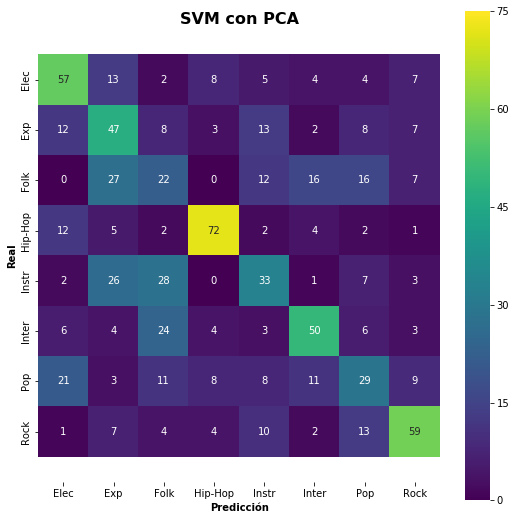

In [18]:
fig, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(cf_matrix_pca, cmap='viridis', vmin=0, vmax=75, square=True, annot=True)

ticks_labels = ['Elec', 'Exp', 'Folk', 'Hip-Hop', 'Instr', 'Inter', 'Pop', 'Rock']
plt.xticks(np.arange(8) + .5, labels=ticks_labels, fontsize = 10)
plt.yticks(np.arange(8) + .5, labels=ticks_labels, va="center", fontsize = 10)

plt.title('SVM con PCA', fontsize = 16, weight='bold')
plt.xlabel('Predicción', weight='bold')
plt.ylabel('Real', weight='bold')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.savefig('fig-SVM-PCA.png', dpi=400, bbox_inches='tight')
plt.show()